
Gene analysis is something which is widely used in biological science.Many of the Data learners coming here will be haveing trouble with these weird transciption numbers. So why not just conver this into just two columns and then apply our analysis.

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df= pd.read_csv('../input/data_set_ALL_AML_train.csv')
df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [26]:
df1 = [col for col in df.columns if "call" not in col]
df = df[df1]
df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [27]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [28]:
df = df.T
df2 = df.drop(['Gene Description','Gene Accession Number'],axis=0)
df2.index = pd.to_numeric(df2.index)
df2.sort_index(inplace=True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


Now see here we are having just 38 columns which are our respective people

In [29]:
df2['cat'] = list(pd.read_csv('../input/actual.csv')[:38]['cancer'])
dic = {'ALL':0,'AML':1}
df2.replace(dic,inplace=True)
df2.head(3)

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cat
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,0
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,0
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,0


# PCA analysis
#### Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

#### In this case we will use it to analyse the feature importanace.

We will reduce the data into two features.

![](https://media.giphy.com/media/QA44U3zAnH0ha/source.gif)

In [30]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df2.drop('cat',axis=1))

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
Y_sklearn = sklearn_pca.fit_transform(X_std)

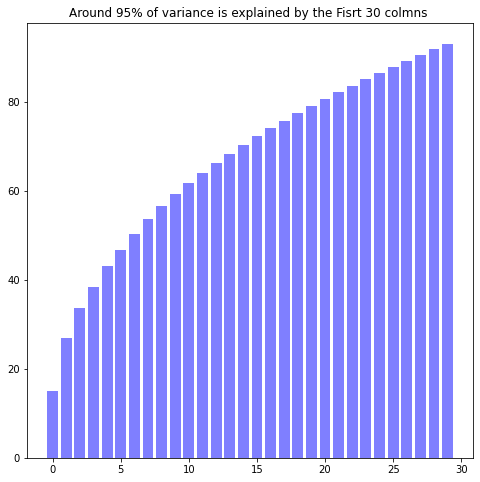

In [31]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(30), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("Around 95% of variance is explained by the Fisrt 30 colmns ");

In [32]:
X_reduced2 = Y_sklearn

In [33]:
df2.cat.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
train = pd.DataFrame(X_reduced2)
train['cat'] =  df2['cat'].reset_index().cat
train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,cat
0,18.544799,5.826943,-19.442313,-11.267566,5.303304,19.100937,-9.447438,0.915309,-8.665217,-7.912754,...,6.323438,5.630107,-4.538090,-14.672156,4.899964,9.335462,-12.552358,2.484640,12.217094,0
1,-7.341389,10.008663,11.795698,3.920823,-13.999094,-18.636026,4.687060,8.812418,1.372678,-11.690751,...,-11.423156,-10.669290,-5.364779,-20.280586,7.685347,23.676243,5.216321,17.828269,-1.015588,0
2,52.852146,11.390630,-29.548566,-38.800348,-22.866689,-9.458113,-22.880735,20.995112,4.038731,-5.260765,...,1.847696,5.073579,0.797486,0.995521,-0.354742,-0.093794,2.769450,-2.868344,7.354274,0


[]

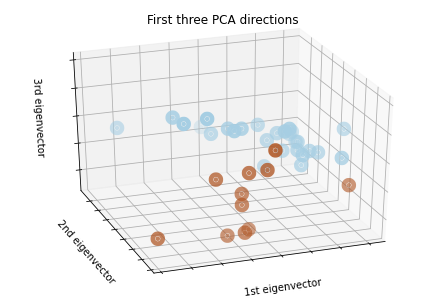

In [35]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=train['cat']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])


Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

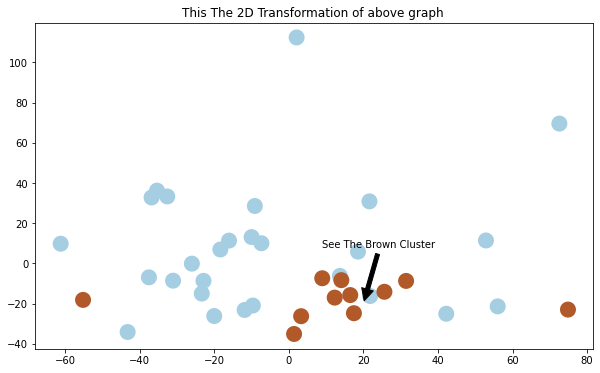

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1, figsize=(10,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df2['cat'],cmap=plt.cm.Paired,linewidths=10)
plt.annotate('See The Brown Cluster',xy=(20,-20),xytext=(9,8),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r')
plt.title("This The 2D Transformation of above graph ")

PCA played a very important role here as we got our clusters and we differentiated cancer disease from it. We can think of this as a cluster.


In [37]:
test = pd.read_csv('../input/data_set_ALL_AML_independent.csv')

test.head(3)

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A


In [38]:
test1 = [col for col in test.columns if "call" not in col]
test = test[test1]
test = test.T
test2 = test.drop(['Gene Description','Gene Accession Number'],axis=0)
test2.index = pd.to_numeric(test2.index)
test2.sort_index(inplace=True)
#test2['cat'] = list(pd.read_csv('actual.csv')[39:63]['cancer'])
#dic = {'ALL':0,'AML':1}
#test2.replace(dic,inplace=True)
#test2

In [39]:
from sklearn.preprocessing import StandardScaler
Y_std = StandardScaler().fit_transform(test2)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
test_reduced = sklearn_pca.fit_transform(Y_std)

In [40]:
test_set = pd.DataFrame(test_reduced)

test_set.head(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,15.954485,-19.998344,34.450819,17.107265,-14.499998,-8.547010,-27.011502,0.893890,28.760512,-11.761661,...,12.181201,-1.930483,-5.577590,0.894264,1.708536,9.909458,1.429599,-1.368022,1.928401,1.395269
1,22.690962,-17.487396,-28.042792,26.803369,-12.457292,12.704222,35.329067,20.194094,43.420264,28.037366,...,3.671538,3.183151,0.897244,0.113003,0.708739,1.036280,4.038658,0.821032,1.411593,1.400042
2,-36.249932,13.988727,-8.697312,10.075214,6.067020,-3.396009,3.167661,13.144338,-3.474793,-5.183876,...,-4.041182,-8.274781,13.887254,-6.468673,-6.302675,-11.033458,-5.795327,-7.775089,-8.975263,11.639648


### As clear from graph it is useful to use KNN to find the required weather that it is ALL or AML.
Depending upon distance

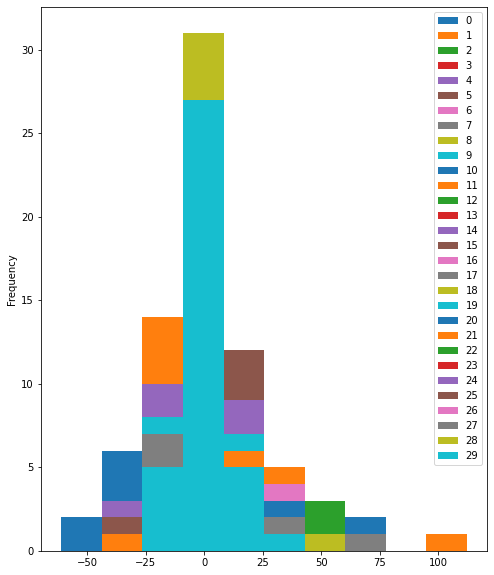

In [41]:
train.drop('cat',axis=1).plot(kind='hist',figsize=(8,10))

In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=10,)
clf.fit(train.drop('cat',axis=1),train['cat'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [43]:
pred = clf.predict(test_set)

pateint = pd.read_csv('../input/actual.csv')['cancer'][38:]

true = pateint.replace(dic)

import sklearn
sklearn.metrics.confusion_matrix(true, pred)

array([[19,  1],
       [13,  1]])

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split=2)
clf.fit(train.drop('cat',axis=1),train['cat'])
pred = clf.predict(test_set)
true = pateint.replace(dic)
print(sklearn.metrics.confusion_matrix(true, pred))
print()

[[13  7]
 [10  4]]



In [45]:
from sklearn import svm

clf=svm.SVC(kernel='linear')
clf.fit(train.drop('cat',axis=1),train['cat'])
pred = clf.predict(test_set)

pateint = pd.read_csv('../input/actual.csv')['cancer'][38:]

true = pateint.replace(dic)

print(sklearn.metrics.confusion_matrix(true, pred))
print()

[[16  4]
 [13  1]]



# Here the Red Points(means test set) is plotted on the training set to just give the illusion that which one falls in which category

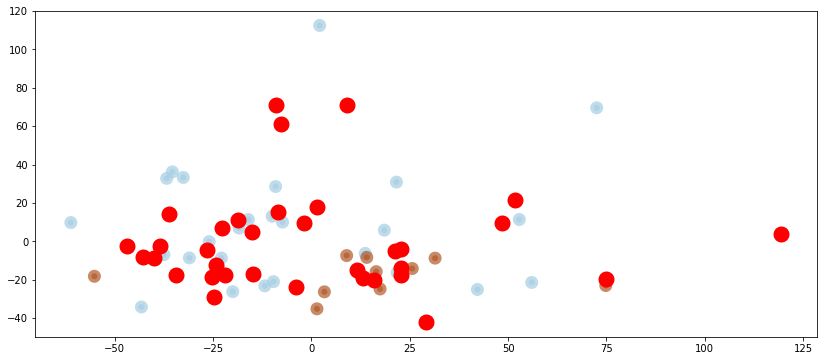

In [46]:
fig = plt.figure(1, figsize=(14,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df2['cat'],cmap=plt.cm.Paired,alpha=0.7,linewidths=7)
plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r',linewidths=10)